<a href="https://colab.research.google.com/github/seremmartin64-ops/ML/blob/main/Tomato_leaf_disease_detection%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# collect dataset from kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seremmartin","key":"f1754a51689dc938ee9c7950275768b2"}'}

In [3]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kaustubhb999/tomatoleaf
!unzip -qq tomatoleaf.zip

Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf
License(s): CC0-1.0
 86% 153M/179M [00:00<00:00, 1.60GB/s]
100% 179M/179M [00:00<00:00, 1.38GB/s]


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [6]:
# Dataset
data_dir = "/content/tomato"

In [7]:
# Image generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
# Training set
train_set = data_gen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


In [9]:
# Validation set
val_set = data_gen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 1000 images belonging to 10 classes.


In [10]:
disease_names = list(train_set.class_indices.keys())
num_classes = len(disease_names)
print("Classes:", disease_names)

Classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [11]:
# building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,073,930 (49.87 MB)

 Trainable params: 13,073,930 (49.87 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Training the model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 180ms/step - accuracy: 0.3785 - loss: 1.7258 - val_accuracy: 0.7060 - val_loss: 0.8515
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.7893 - loss: 0.5923 - val_accuracy: 0.8140 - val_loss: 0.5174
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.8514 - loss: 0.4208 - val_accuracy: 0.8500 - val_loss: 0.4519
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.8774 - loss: 0.3466 - val_accuracy: 0.8220 - val_loss: 0.6120
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.8933 - loss: 0.3045 - val_accuracy: 0.8620 - val_loss: 0.4377
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 168ms/step - accuracy: 0.9154 - loss: 0.2520 - val_accuracy: 0.8920 - val_loss: 0.3454
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.9247 - loss: 0.2119 - val_accuracy: 0.8870 - val_loss: 0.2839
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.9289 - loss: 0

In [18]:
# Evaluating the model
scores = model.evaluate(val_set)
print(f"\nTest Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]*100:.2f}%")




32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9025 - loss: 0.3393

Test Loss: 0.3321
Test Accuracy: 89.80%


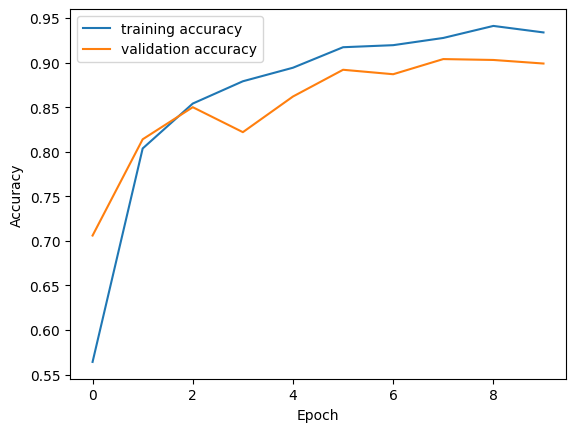

In [22]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

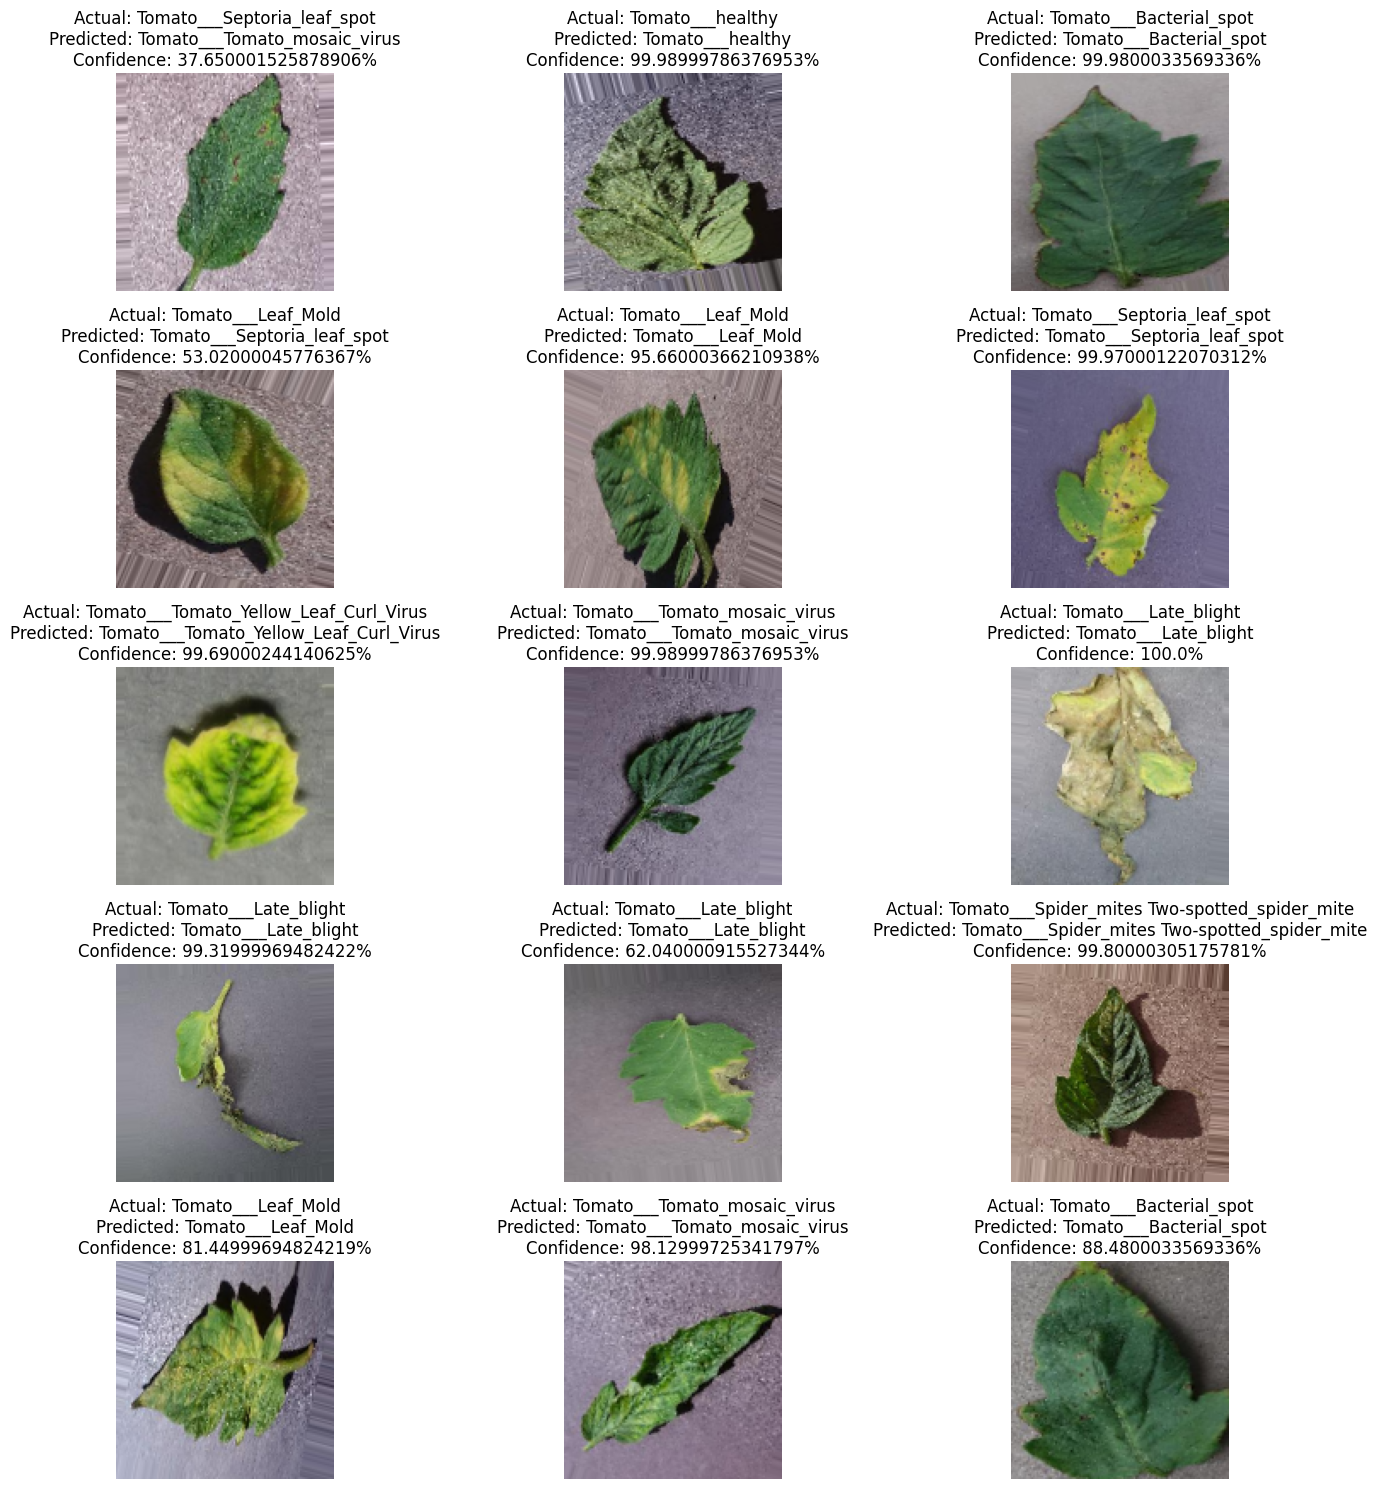

In [23]:
# make prediction
x_batch, y_batch = next(val_set)

plt.figure(figsize=(15, 15))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    img = x_batch[i]

    # Get actual label
    actual_idx = int(np.argmax(y_batch[i]))
    actual_label = disease_names[actual_idx]

    # Get prediction
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array, verbose=0)[0]
    predicted_label = disease_names[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)

    plt.imshow(img)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nConfidence: {confidence}%")
    plt.axis("off")

plt.tight_layout()
plt.show()